In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [13]:
# Keeping random data over multiple runs of code the same
np.random.seed(42)

In [14]:
# storing our randomly generated data and labels
data = []
groups = []
labels_var = []
labels_size = []


In [15]:
# the values we use for stD and the sample sizes
variability = [5, 20, 50]
sizes = [10, 100, 10000]


In [16]:
# Generating data for each group for each combination of variability and sample size
for var in variability:
    for size in sizes:
        data.extend(np.random.normal(20,var,size))
        data.extend(np.random.normal(35,var,size))
        labels_var.extend([var]*size*2)
        labels_size.extend([size]*size*2)
        groups.extend(['group1']*size)
        groups.extend(['group2']*size)

In [17]:
data = pd.DataFrame({'data' : data,
                    'groups' : groups,
                    'variability' : labels_var,
                    'size' : labels_size})
print(data.head())

        data  groups  size  variability
0  22.483571  group1    10            5
1  19.308678  group1    10            5
2  23.238443  group1    10            5
3  27.615149  group1    10            5
4  18.829233  group1    10            5


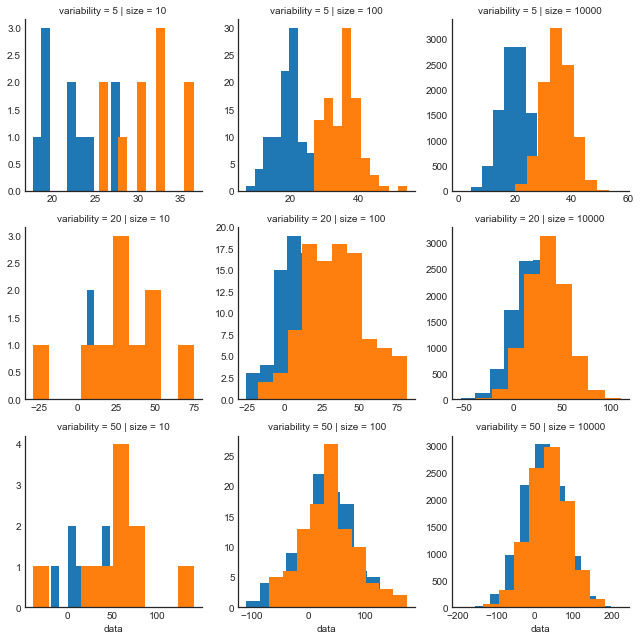

In [18]:
# Plotting the data

sns.set_style('white')

g = sns.FacetGrid(data, col='size', row='variability', hue='groups', sharex=False, sharey=False)
g.map(plt.hist, 'data')
plt.show()

In [21]:
data_test = data.set_index(['groups', 'size', 'variability'])

tvalues=[]
pvalues=[]

for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1', size, var), level=('groups', 'size', 'variability'))
        b = data_test['data'].xs(('group2', size, var), level=('groups', 'size', 'variability'))
        tval,pval=stats.ttest_ind(b, a, equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)

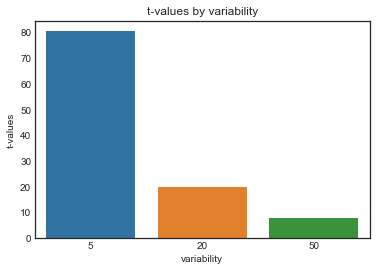

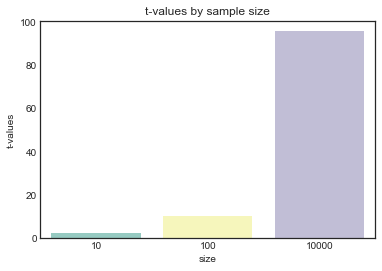

In [22]:
tvalues_plot = pd.DataFrame({'t':tvalues,
                            'p':pvalues,
                            'variability':variability*3,
                            'size':np.repeat(sizes,3)})

ax = sns.barplot(y='t', x='variability',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by variability')
plt.show()

ax = sns.barplot(y='t',x='size',ci=None,data=tvalues_plot,palette='Set3')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()